In [1]:
#Importando Librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [3]:
# Cargar los datos directamente con pandas
file_path = '/content/IMDBtop1000.csv'
df = pd.read_csv(file_path)

# Información general del dataset
print("Información del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Certificate  973 non-null    object 
 3   Duration     1000 non-null   object 
 4   Genre        1000 non-null   object 
 5   Rate         1000 non-null   float64
 6   Metascore    712 non-null    float64
 7   Description  1000 non-null   object 
 8   Cast         1000 non-null   object 
 9   Info         1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.2+ KB
None


In [4]:
# Ver las primeras filas
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   Unnamed: 0                                              Title Certificate  \
0           0                 1. The Shawshank Redemption (1994)           R   
1           1                            2. The Godfather (1972)           R   
2           2                          3. The Dark Knight (2008)       PG-13   
3           3                   4. The Godfather: Part II (1974)           R   
4           4  5. The Lord of the Rings: The Return of the Ki...       PG-13   

  Duration                     Genre  Rate  Metascore  \
0  142 min                     Drama   9.3       80.0   
1  175 min              Crime, Drama   9.2      100.0   
2  152 min      Action, Crime, Drama   9.0       84.0   
3  202 min              Crime, Drama   9.0       90.0   
4  201 min  Action, Adventure, Drama   8.9       94.0   

                                         Description  \
0  Two imprisoned men bond over a number of years...   
1  The aging patriarch of an organiz

In [5]:
# Descripción estadística
print("Descripción estadística del dataset:")
print(df.describe(include='all'))

Descripción estadística del dataset:
         Unnamed: 0                        Title Certificate Duration  Genre  \
count   1000.000000                         1000         973     1000   1000   
unique          NaN                          398          11      114    130   
top             NaN  302. Throne of Blood (1957)           R  110 min  Drama   
freq            NaN                            8         345       40     98   
mean     499.500000                          NaN         NaN      NaN    NaN   
std      288.819436                          NaN         NaN      NaN    NaN   
min        0.000000                          NaN         NaN      NaN    NaN   
25%      249.750000                          NaN         NaN      NaN    NaN   
50%      499.500000                          NaN         NaN      NaN    NaN   
75%      749.250000                          NaN         NaN      NaN    NaN   
max      999.000000                          NaN         NaN      NaN    NaN   

  

In [6]:
# Revisar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Unnamed: 0       0
Title            0
Certificate     27
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
dtype: int64


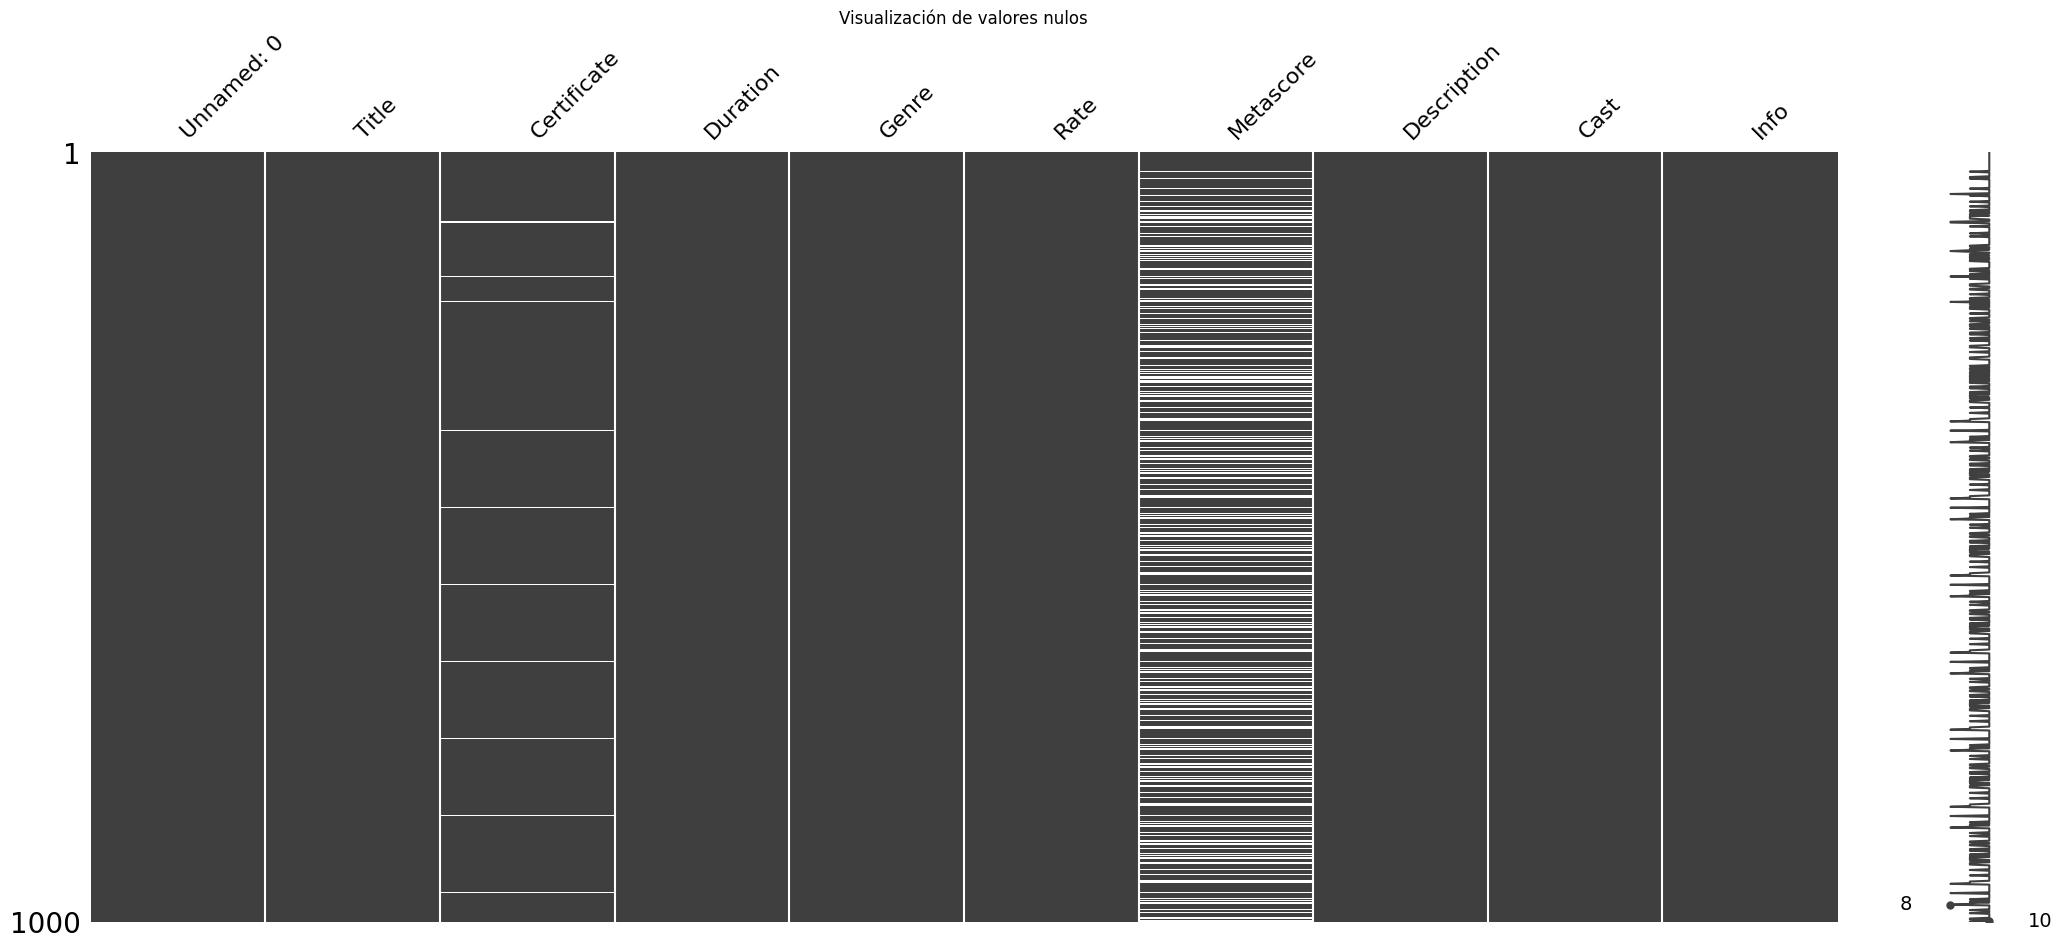

In [7]:
# Visualización de valores nulos
msno.matrix(df)
plt.title("Visualización de valores nulos")
plt.show()

El dataset tiene algunos valores nulos concentrados principalmente en las columnas Certificate, Metascore, y en menor medida Info.
Para un análisis adecuado, puede ser necesario lidiar con estos valores nulos, ya sea eliminando las filas que contienen datos faltantes o utilizando técnicas como imputación para llenar esos vacíos.


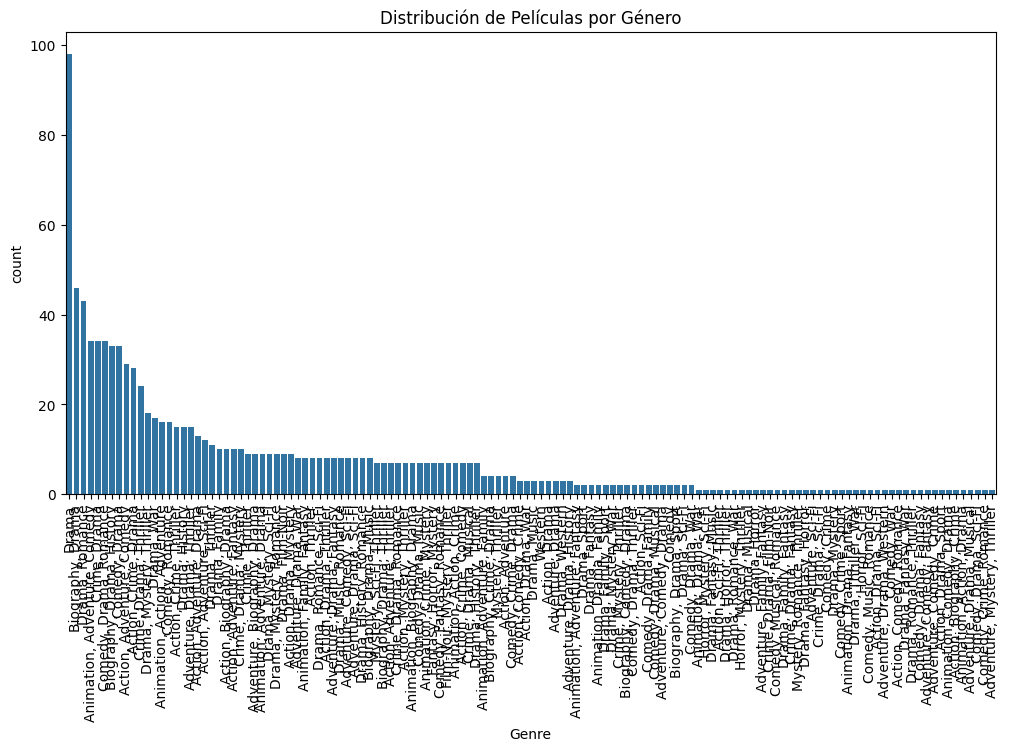

In [8]:
# Distribución de películas por género
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribución de Películas por Género')
plt.show()

Esta información es útil para entender qué tipos de películas están mejor representados en el dataset y cuáles son más raros. Esto también podría sugerir que, si estás interesado en hacer un análisis basado en géneros menos comunes, puede que tengas datos limitados para trabajar.

In [11]:
# Distribución de la calificación IMDb (o cambiar por la columna correspondiente)
if 'IMDB_Rating' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
    plt.title('Distribución de Calificación IMDb')
    plt.xlabel('Calificación IMDb')
    plt.ylabel('Frecuencia')
    plt.show()

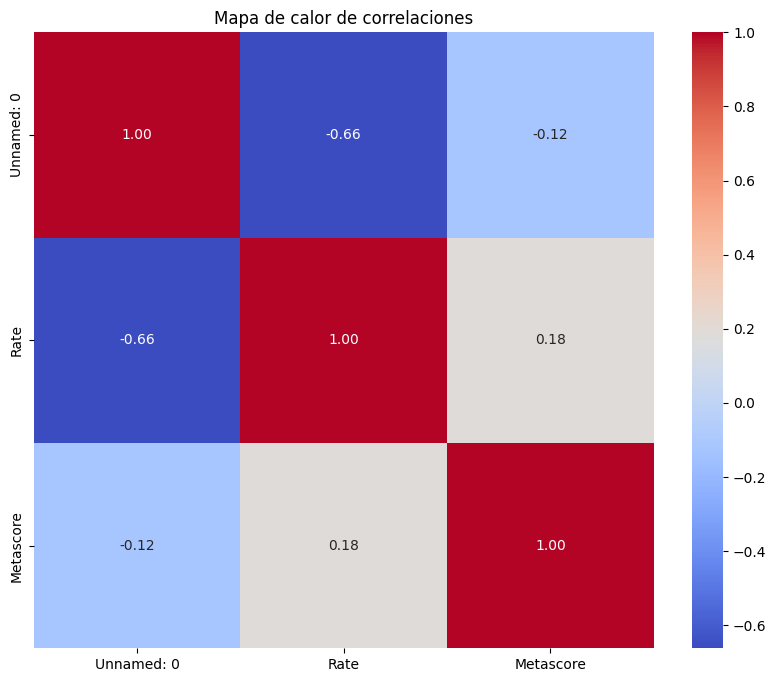

In [13]:
# Correlación entre variables numéricas
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()

Las correlaciones más relevantes son entre Rate y Metascore, aunque es débil (0.18), y una correlación negativa más fuerte entre Unnamed: 0 y Rate, pero al ser "Unnamed: 0" un índice, esto no es útil para el análisis.
No parece haber relaciones fuertes entre las variables seleccionadas en este gráfico.